In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

In [2]:
xy=[(-5, -5), (5, -5), (5, 5), (-5, 5)]
Nsides = len(xy)
xp = np.zeros(Nsides + 1, "d")
yp = np.zeros(Nsides + 1, "d")
z1 = np.zeros(Nsides, "D")
z2 = np.zeros(Nsides, "D")

In [3]:
for i in range(Nsides):
    xp[i] = xy[i][0]
    yp[i] = xy[i][1]
    z1[i] = complex(xp[i], yp[i])
xp[-1] = xy[0][0]
yp[-1] = xy[0][1]
z2[:-1] = z1[1:]
z2[-1] = z1[0]

In [7]:
def isinside(xy, x, y):
    """returns 0 if outside the polygon and > 0 if inside"""
    z = x + 1j*y
    gamma = 1/(4*np.pi*i)*np.sum(np.log((z - z2)/(z - z1)) - np.log((z - z2)/(z - z1)).conj())
    return gamma

In [8]:
def PolygonArea(xy):
    n = len(xy)
    area = 0.0
    for i in range(n):
        j = (i + 1) % n
        area += xy[i][0] * xy[j][1]
        area -= xy[j][0] * xy[i][1]
    area = abs(area) / 2.0
    return area

In [9]:
isinside(xy, 1, 1)

0.3333333333333333j

In [10]:
isinside(xy, 12, 12)

8.834874115176436e-18j

In [11]:
isinside(xy, 10, 11)

2.9449580383921452e-18j

In [12]:
isinside(xy, 10, 10)

-2.9449580383921452e-18j

In [13]:
def zetaj(x, y, z1, z2):
    z = x + 1j*y
    zetaj = (2*z - z1 - z2)/(z2 - z1)
    return zetaj

In [14]:
def zetajplus(x, y, z1, z2):
    z = x + 1j*y
    zetaplus = 2.0*(z - z1)/(z2 - z1)
    return zetaplus
def zetajminus(x, y, z1, z2):
    z = x + 1j*y
    zetaminus = 2.0*(z - z2)/(z2 - z1)
    return zetaminus

In [15]:
def zetamplus(x, y, z1, z2):
    z = x + 1j*y
    zetamplus = 2*(z - z1[1:])/(z2[1:] - z1[1:])
    return zetamplus

def zetamminus(x, y, z1, z2):
    z = x + 1j*y
    zetamminus = 2*(z - z2[1:])/(z2[1:] - z1[1:])
    return zetamminus

In [16]:
def etaj(x, y, z1, z2):
    return zetajplus(x, y, z1, z2)*np.log(zetajminus(x, y, z1, z2)/zetajplus(x, y, z1, z2)) + 2*np.sum(np.log(zetamminus(x, y, z1, z2)/zetamplus(x, y, z1, z2)) + 2)

In [17]:
# valid for piecwise constant polygon. Eq 8.581
def piecewise_potinf(x, y, z1, z2, xy, gamma):
    
    z = x + 1j*y
    
    area = PolygonArea(xy)
    
    yj = zetaj(x, y, z1, z2).conj() - zetaj(x, y, z1, z2)
    
    zjm = zetajminus(x, y, z1, z2)
    zjp = zetajplus(x, y, z1, z2)
    fzj = (zjm)*np.log(zjm) - zjp*np.log(zjp) + 2 - 2*np.log(0.5*(z2 - z1)) 
    
    Ljsq = (z2-z1)*(z2-z1).conj()
    
    pot = -gamma/(32*np.pi)*np.sum(yj*Ljsq*(fzj + fzj.conj()))
    
    return pot

In [18]:
piecewise_potinf(0, 0, z1, z2, xy, 1)

(-0-55.43079126193113j)

In [19]:
# valid outside the polygon. Eq 8.598
def comega(x, y, z1, z2, xy, gamma):
    
    area = PolygonArea(xy)
    
    z = x + 1j*y
    
    Ljsq = (z2-z1)*(z2-z1).conj()
    zj = zetaj(x, y, z1, z2)
    ej = etaj(x, y, z1, z2)
    
    comega = -gamma/(32*np.pi*i)*np.sum(Ljsq*(zj - zj.conj()) * ej + gamma * area/(2*np.pi) * np.log(z - z1))
    return comega

In [20]:
comega(0, 0, z1, z2, xy, 1)

(28.753780415264544-27.664321951712406j)

In [21]:
# valid for points inside the polygon. Eq 8.594
def potinf(x, y, z1, z2, xy, gamma):
    
    z = x + 1j*y
    
    area = PolygonArea(xy)
    yj = zetaj(x, y, z1, z2).conj() - zetaj(x, y, z1, z2)

    Ljsq = (z2-z1)*(z2-z1).conj()
    ej = etaj(x, y, z1, z2)
    
    pot = -gamma/(32*np.pi)*np.sum(yj*Ljsq*(ej + ej.conj()) + gamma*area/(4*np.pi)*(np.log(z - z1) + np.log(z.conjugate() - z1.conj())))
    
    return pot

In [22]:
potinf(0, 0, z1, z2, xy, 1)

(-1.2386587542063605+165.98593171027443j)

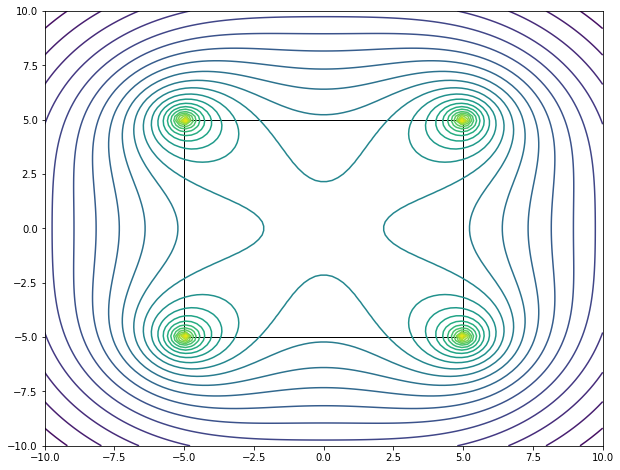

In [29]:
xg, yg = np.linspace(-10, 10, 100), np.linspace(-10, 10, 100)
nx, ny = len(xg), len(yg)
h = np.empty((ny, nx))
for j in range(ny):
    for i in range(nx):
        h[j, i] = potinf(xg[i], yg[j], z1, z2, xy, 1).real

plt.figure(figsize=(10,8))
plt.contour(xg, yg, h, levels=30)
fig = plt.gcf()
ax = plt.gca()
poly = Polygon(xy, closed=True, fill=False)
ax.add_patch(poly)

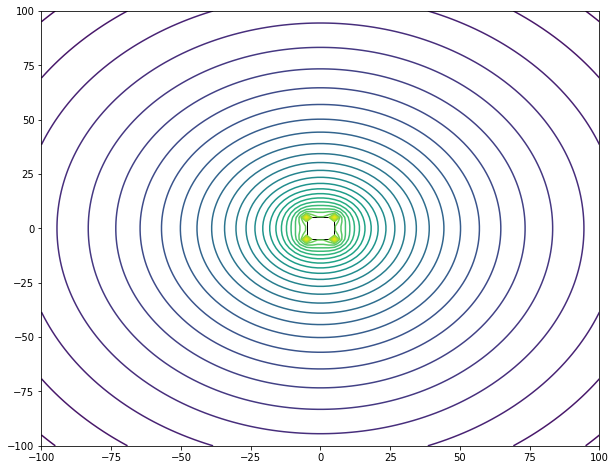

In [30]:
xg, yg = np.linspace(-100, 100, 100), np.linspace(-100, 100, 100)
nx, ny = len(xg), len(yg)
h = np.empty((ny, nx))
for j in range(ny):
    for i in range(nx):
        h[j, i] = potinf(xg[i], yg[j], z1, z2, xy, 1).real

plt.figure(figsize=(10,8))
plt.contour(xg, yg, h, levels =30)
fig = plt.gcf()
ax = plt.gca()
poly = Polygon(xy, closed=True, fill=False)
ax.add_patch(poly)